In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'cyber-security-attacks:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3859456%2F8138336%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240512%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240512T140710Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D1031d6ddcfd245696f86722105c5168ff3821190ef70af1e42005e1feab64fb3331b01ffbd8494de18d7159041e20f6f0d3102dc8ca623d1ca9f5e795c62beb0d9829d683102890eeb952d5dfa55706633ac98c23525fed2356ad496521eb8cafe4294cc5a65c089e3e3a03d45c501c92ed481f78ab9116a9e876a83bc6e026655f5f468cc3c3d2a9c99a296f8d14637456ca157a1026303cb5ec85801378c820f6271290d141ac1e9c94c0e606a66cb08a6b5d77726541d96846bcb7601d2c9893d2ec120ccd092df6c00b0e2630f4a318ae2ddf76fed9bcad632a053953ab27b3081f551027f4d9c555ef9b1a31e08b5aef5889b807031c1eb813b369d1753'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 5276028 bytes downloaded
Downloaded and uncompressed: cyber-security-attacks
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cyber-security-attacks/README.md
/kaggle/input/cyber-security-attacks/cybersecurity_attacks.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import precision_score, recall_score
import tkinter as tk

In [ ]:
df=pd.read_csv("/kaggle/input/cyber-security-attacks/cybersecurity_attacks.csv")
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [ ]:
df.shape

(40000, 25)

In [ ]:
df.isnull().any()

Timestamp                 False
Source IP Address         False
Destination IP Address    False
Source Port               False
Destination Port          False
Protocol                  False
Packet Length             False
Packet Type               False
Traffic Type              False
Payload Data              False
Malware Indicators         True
Anomaly Scores            False
Alerts/Warnings            True
Attack Type               False
Attack Signature          False
Action Taken              False
Severity Level            False
User Information          False
Device Information        False
Network Segment           False
Geo-location Data         False
Proxy Information          True
Firewall Logs              True
IDS/IPS Alerts             True
Log Source                False
dtype: bool

In [ ]:
df.isnull().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [ ]:
df.drop(['Timestamp', 'Payload Data', 'Source Port', 'Destination Port', 'IDS/IPS Alerts', 'Source IP Address','Destination IP Address','User Information', 'Device Information','Geo-location Data', 'Firewall Logs', 'Proxy Information','Log Source'], axis=1, inplace=True)

In [ ]:
df['Malware Indicators'].fillna('None Detected', inplace=True)
df['Alerts/Warnings'].fillna('No Alert', inplace=True)

In [ ]:
df.head()

,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,Network Segment
0,ICMP,503,Data,HTTP,IoC Detected,28.67,No Alert,Malware,Known Pattern B,Logged,Low,Segment A
1,ICMP,1174,Data,HTTP,IoC Detected,51.50,No Alert,Malware,Known Pattern A,Blocked,Low,Segment B
2,UDP,306,Control,HTTP,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Segment C
3,UDP,385,Data,HTTP,None Detected,15.79,Alert Triggered,Malware,Known Pattern B,Blocked,Medium,Segment B
4,TCP,1462,Data,DNS,None Detected,0.52,Alert Triggered,DDoS,Known Pattern B,Blocked,Low,Segment C


In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

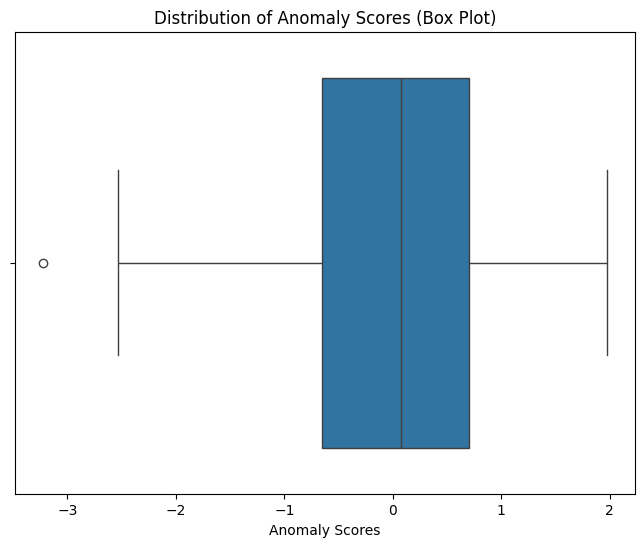

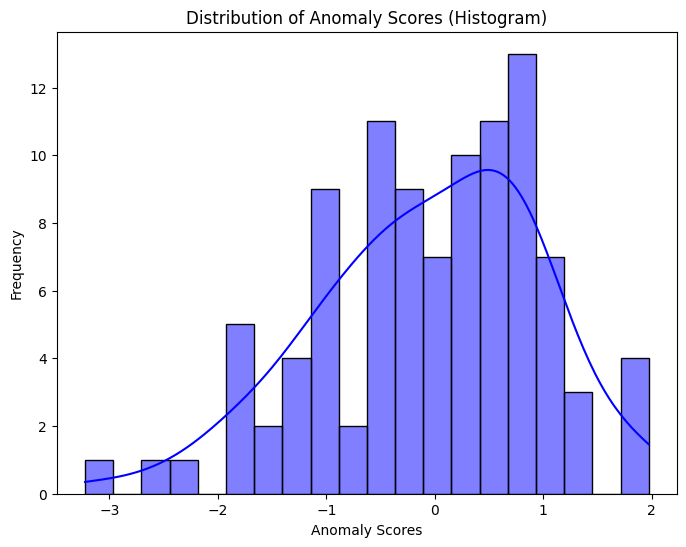

In [ ]:
anomaly_scores = np.random.normal(size=100)

plt.figure(figsize=(8, 6))
sns.boxplot(x=anomaly_scores)
plt.title('Distribution of Anomaly Scores (Box Plot)')
plt.xlabel('Anomaly Scores')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(anomaly_scores, kde=True, bins=20, color='blue')
plt.title('Distribution of Anomaly Scores (Histogram)')
plt.xlabel('Anomaly Scores')
plt.ylabel('Frequency')
plt.show()

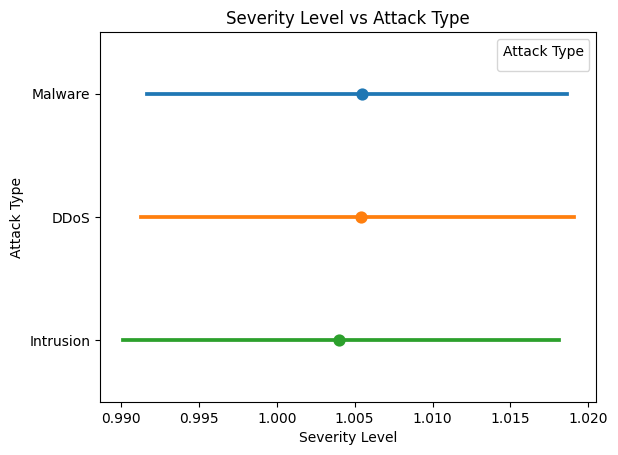

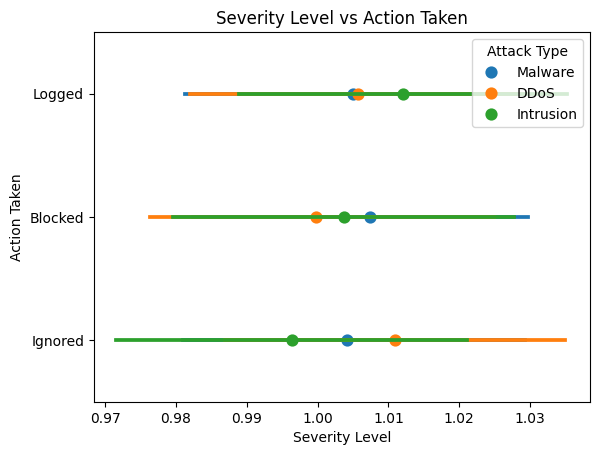

In [ ]:
df['Severity Level'] = pd.factorize(df['Severity Level'])[0]

sns.pointplot(data=df, x="Severity Level", y="Attack Type", hue="Attack Type", markers="o", linestyles="")
plt.title("Severity Level vs Attack Type")
plt.xlabel("Severity Level")
plt.ylabel("Attack Type")
plt.legend(title="Attack Type", loc="upper right")
plt.show()
sns.pointplot(data=df, x="Severity Level", y="Action Taken", hue="Attack Type", markers="o", linestyles="")
plt.title("Severity Level vs Action Taken")
plt.xlabel("Severity Level")
plt.ylabel("Action Taken")
plt.legend(title="Attack Type", loc="upper right")
plt.show()

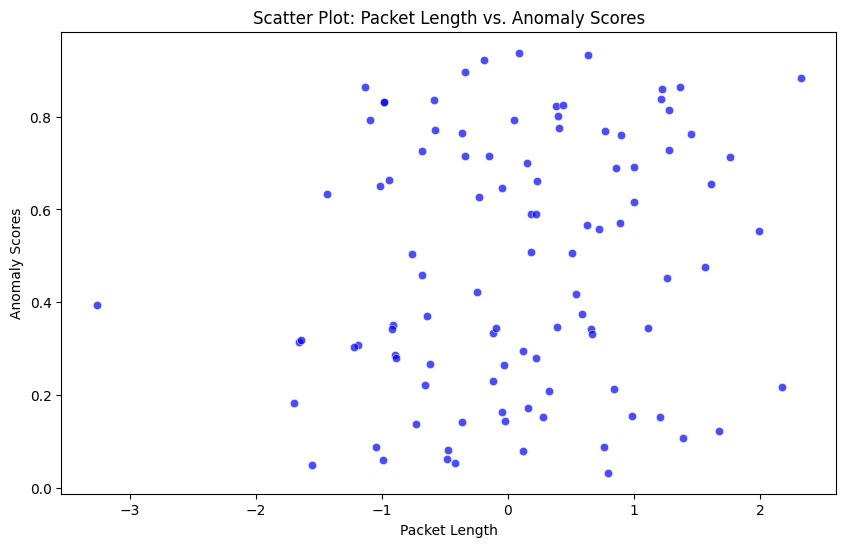

In [ ]:
packet_length = np.random.normal(size=100)
anomaly_scores = np.random.uniform(low=0, high=1, size=100)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=packet_length, y=anomaly_scores, color='blue', alpha=0.7)
plt.title('Scatter Plot: Packet Length vs. Anomaly Scores')
plt.xlabel('Packet Length')
plt.ylabel('Anomaly Scores')
plt.show()

In [ ]:
y = df["Attack Type"]
X = df.drop(["Attack Type"],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train

,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Signature,Action Taken,Severity Level,Network Segment
5751,UDP,1300,Data,HTTP,IoC Detected,37.50,No Alert,Known Pattern A,Blocked,Medium,Segment B
25284,ICMP,222,Control,DNS,None Detected,75.98,No Alert,Known Pattern B,Logged,High,Segment A
1573,TCP,380,Data,FTP,None Detected,37.22,No Alert,Known Pattern A,Logged,Low,Segment A
4352,ICMP,1039,Control,HTTP,IoC Detected,91.35,No Alert,Known Pattern A,Ignored,Medium,Segment A
22867,ICMP,1376,Data,FTP,None Detected,48.83,No Alert,Known Pattern A,Blocked,High,Segment C
...,...,...,...,...,...,...,...,...,...,...,...
20069,TCP,994,Data,DNS,IoC Detected,25.61,Alert Triggered,Known Pattern A,Blocked,High,Segment A
26828,ICMP,1244,Data,FTP,None Detected,10.38,No Alert,Known Pattern B,Ignored,High,Segment C
38667,TCP,921,Data,HTTP,IoC Detected,28.44,Alert Triggered,Known Pattern A,Ignored,High,Segment B
2362,UDP,1002,Control,HTTP,IoC Detected,40.18,Alert Triggered,Known Pattern B,Logged,Low,Segment B


In [ ]:
X_test

,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Signature,Action Taken,Severity Level,Network Segment
9801,ICMP,1392,Control,DNS,IoC Detected,66.47,No Alert,Known Pattern A,Logged,Low,Segment A
18548,TCP,321,Data,HTTP,IoC Detected,22.02,No Alert,Known Pattern A,Blocked,Low,Segment A
11590,TCP,481,Data,HTTP,IoC Detected,96.08,No Alert,Known Pattern A,Blocked,Low,Segment C
14072,ICMP,1291,Control,FTP,None Detected,22.47,Alert Triggered,Known Pattern A,Ignored,Low,Segment A
17595,TCP,1246,Data,HTTP,IoC Detected,69.57,Alert Triggered,Known Pattern B,Logged,High,Segment A
...,...,...,...,...,...,...,...,...,...,...,...
26566,ICMP,354,Control,DNS,None Detected,46.15,Alert Triggered,Known Pattern A,Ignored,High,Segment A
28498,ICMP,1394,Control,FTP,IoC Detected,14.23,No Alert,Known Pattern B,Blocked,High,Segment B
33135,TCP,1150,Control,DNS,None Detected,56.46,Alert Triggered,Known Pattern A,Blocked,Medium,Segment A
25628,ICMP,760,Data,HTTP,None Detected,99.93,No Alert,Known Pattern A,Blocked,Low,Segment B


In [ ]:
def model (num,X,y):

    if(num==1):
        X, y = make_regression(n_features=4, n_informative=2,
                         random_state=0, shuffle=False)
        regr = RandomForestRegressor(max_depth=2, random_state=0)
        regr.fit(X, y)
        regr.score(X,y)
        score=regr.score(X,y)

    if(num==2):
        X, y = make_classification(n_samples=1000, n_features=4,
                             n_informative=2, n_redundant=0,
                             random_state=0, shuffle=False)
        clf = RandomForestClassifier(max_depth=2, random_state=0)
        clf.fit(X, y)
        clf.score(X, y)
        score=clf.score(X,y)
    if(num==3):
        X, y = load_iris(return_X_y=True)
        clf = LogisticRegression()
        clf.fit(X, y)
        score=clf.score(X,y)
    if(num==4):
        reg = LinearRegression().fit(X, y)
        reg.score(X, y)
        score=regr.score(X,y)
    return score

In [ ]:
model(1,X,y)

In [ ]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (40000, 11)
y shape: (40000,)


In [ ]:
X, y = make_regression(n_features=4, n_informative=2,
                         random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)
regr.score(X,y)
score=regr.score(X,y)
y_pred = regr.predict(X)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
print("Score:", score)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Score: 0.8435830500065526
Mean Squared Error: 232.4546273335677
Mean Absolute Error: 12.672871643060946


In [ ]:
X, y = make_classification(n_samples=1000, n_features=4, n_informative=2,
                           n_redundant=0, random_state=0, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
score=clf.score(X,y)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test. flatten(), y_pred. flatten())

print("Score:", score)
print("Precision:", precision)
print("Recall:", recall)

Score: 0.946
Precision: 0.9569500239120038
Recall: 0.9520958083832335


In [ ]:
model=clf

In [ ]:
X, y = load_iris(return_X_y=True)
clf = LogisticRegression()
clf.fit(X, y)
score=clf.score(X,y)
y_pred = clf.predict(X_test)
precision = precision_score(y_test, y_pred, average='weighted')
print("Score:", score)
print("Precision:", precision)

Score: 0.9733333333333334
Precision: 0.19488814317673378


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
def trees_in_forest_vs_acc(trees, x_train=X_train, y_train=y_train, x_test=X_test, y_test=y_test):
    rfc = RandomForestClassifier(n_estimators=trees, criterion='entropy', random_state=0)
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

In [ ]:
trees_list_for_randomForest = [100, 200, 300, 500, 700, 1000]
acc_scores_for_trees_RFC = []
for x in trees_list_for_randomForest:
    acc_scores_for_trees_RFC.append(trees_in_forest_vs_acc(x))
acc_scores_for_trees_RFC

[0.9533333333333334, 0.96, 0.96, 0.96, 0.96, 0.96]

,No. of trees in Forest,Accuracy scores for Random Forest Classification
0,100,0.953333
1,200,0.960000
2,300,0.960000
3,500,0.960000
4,700,0.960000


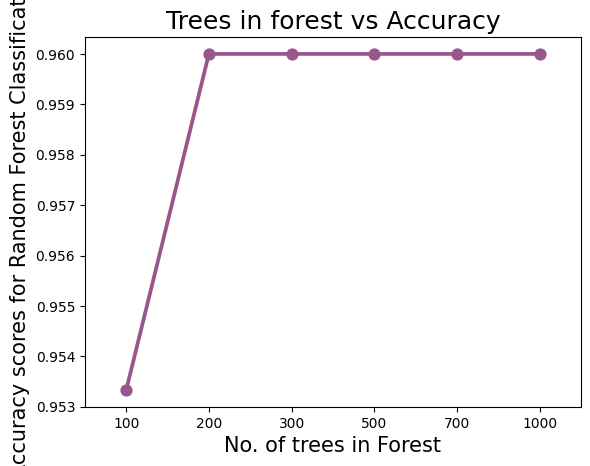

In [ ]:
tree_vs_acc = pd.DataFrame({'No. of trees in Forest':trees_list_for_randomForest,
              'Accuracy scores for Random Forest Classification':acc_scores_for_trees_RFC})


sns.pointplot(x='No. of trees in Forest',y='Accuracy scores for Random Forest Classification',data=tree_vs_acc,color='#98568d')

plt.title('Trees in forest vs Accuracy',size=18)
plt.xlabel('No. of trees in Forest',size=15)
plt.ylabel('Accuracy scores for Random Forest Classification',size=15)


tree_vs_acc.head()

In [ ]:
import pickle

# Save to file in the current working directory
pkl_filename = "model1.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

# Calculate the accuracy score and predict target values
score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(X_test)

Test score: 95.67 %


In [ ]:
pkl_filename = "model1.pkl"
with open(pkl_filename, 'rb') as f_in:
    model = pickle.load(f_in)